# Trabalho Implementação I
Segue em anexo um dataset chamado Covid1 com dados de exames de covid, onde o nome e o CPF dos indivíduos foram removidos. Gere um dataset similar ao Covid1 onde voce removeu a coluna "DataNascimento", chame-o de Covid2. Tenha o cuidado de manter a totalidade dos registros.
Implemente um programa que: 
1. calcula a frequência de exames com resultado positivo por idade do requisitante com base na coluna "DataNascimento" usando o dataset Covid1. Considere a coluna "dataSolicitacaoExame" para chegar à idade a partir do ano de nascimento. Plote o histograma mostrando apenas os anos onde ha casos positivos;
2. usando o dataset Covid2, calcula a frequência de exames com resultado positivo por ano de nascimento com base na coluna "IdadeCaso". Plote o histograma mostrando apenas os anos onde ha casos positivos;
3. Usando novamente o dataset Covid2, calcula a frequência de exames com resultado positivo por quinquenio com base na coluna "faixaEtaria". Plote o histograma mostrando apenas os quinquenios onde ha casos positivos.
Voce deve fazer o upload do código (pode ser em python) na plataforma Classroom respeitando o prazo para fazer o upload, que se encerrará ao 1/2 dia da data de apresentação.
Durante a aula de apresentação, cada um de voces vai mostrar o código e explicá-lo para todos. Voce terá a sua disposição o projetor, tudo o mais é de sua responsabilidade providenciar para a apresentação durante a aula, em particular adaptador se o seu notebook não dispõe de entrada VGA.

## Geração dataset Covid2

In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with duckdb.connect() as conn:
    relation = conn.read_csv("Covid1.csv", delimiter=";", sample_size=-1)
    conn.register("exames", relation)

    query = """
    SELECT * EXCLUDE DataNascimento from exames
    """

    df_result = conn.execute(query).fetch_df()


In [3]:
df_result.tail()

,identificadorCaso,idRedcap,idEsus,idSivep,classificacaoEstadoRedcap,classificacaoEstadoEsus,classificacaoFinalEsus,evolucaoCasoEsus,cboEsus,profissionalSaudeEsus,...,tipoObitoMaterno,classificacaoFinalCasoSivep,gestante,tipoTesteEsus,obitoConfirmado,dataObito,classificacaoObito,localObito,tipoLocalObito,PACIENTEPOSITIVONOBITO
855798,75d8e014975a66b0769b234658edb67a,None,2.320092e+11,NaN,None,Negativo,Descartado,Cura,None,False,...,None,None,<NA>,TESTE RÁPIDO - ANTÍGENO,0,NaT,None,None,None,0
855799,5ee9c90b62033a4bec7bc985ea2b325d,None,2.320016e+11,NaN,None,Negativo,Descartado,Cura,None,False,...,None,None,<NA>,TESTE RÁPIDO - ANTICORPO,0,NaT,None,None,None,0
855800,27910d40cd4ae78ed0004b753b2834a4,None,2.320034e+11,NaN,None,Negativo,Descartado,Cura,None,False,...,None,None,<NA>,TESTE RÁPIDO - ANTICORPO,0,NaT,None,None,None,0
855801,204dd67198c894f07feb0d1108a5aa68,None,2.320013e+11,NaN,None,Negativo,Descartado,Cura,None,False,...,None,None,<NA>,TESTE RÁPIDO - ANTICORPO,0,NaT,None,None,None,0
855802,2c80ca5c904a993f9b9b265915fa4a2b,None,NaN,NaN,None,None,None,None,None,<NA>,...,None,None,<NA>,None,0,NaT,None,None,None,0


In [4]:
df_result.describe()

,idEsus,idSivep,codigoMunicipioCaso,idadeCaso,dataNotificacao,dataSolicitacaoExame,dataColetaExame,dataResultadoExame,dataInternacaoSivep,dataSaidaUTISivep,dataEvolucaoCasoSivep,requisicaoGal,dataNotificacaoObito,obitoConfirmado,dataObito,PACIENTEPOSITIVONOBITO
count,6.757660e+05,1.234600e+04,855803.000000,855712.00000,658883,220133,765567,764722,10620,1283,8669,2.228840e+05,6942,855803.000000,6942,855803.000000
mean,2.464066e+11,3.159598e+11,230635.236088,39.14965,2020-08-19 06:06:48.374779,2020-10-03 00:43:02.976655,2020-08-22 10:07:19.044002,2020-08-24 04:27:49.609766,2020-07-20 20:51:55.932203,2020-07-19 12:16:16.461418,2020-07-11 14:07:19.358634,2.028933e+11,2020-07-16 15:53:06.901779,0.006383,2020-07-03 01:27:57.095937,0.282611
min,2.020129e+08,3.158344e+11,230010.000000,0.00000,2020-01-01 00:00:00,2020-02-03 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-01-06 00:00:00,2020-03-27 00:00:00,2020-03-17 00:00:00,2.000000e+02,2020-05-13 14:55:51.960000,0.000000,2020-03-21 00:00:00,0.000000
25%,2.320072e+11,3.159060e+11,230430.000000,26.00000,2020-06-25 00:00:00,2020-08-17 00:00:00,2020-06-28 00:00:00,2020-06-29 00:00:00,2020-05-15 00:00:00,2020-05-29 00:00:00,2020-05-19 00:00:00,2.001590e+11,2020-05-24 16:56:02.607250,0.000000,2020-05-15 00:00:00,0.000000
50%,2.320179e+11,3.159412e+11,230465.000000,37.00000,2020-08-04 00:00:00,2020-10-14 00:00:00,2020-08-12 00:00:00,2020-08-13 22:15:06,2020-06-19 00:00:00,2020-07-04 00:00:00,2020-06-18 00:00:00,2.008050e+11,2020-06-19 11:50:20.570000,0.000000,2020-06-09 00:00:00,0.000000
75%,2.320364e+11,3.160087e+11,230830.000000,51.00000,2020-10-08 00:00:00,2020-12-02 00:00:00,2020-10-15 00:00:00,2020-10-16 16:10:15.750000,2020-09-04 00:00:00,2020-08-28 00:00:00,2020-08-20 00:00:00,2.018090e+11,2020-08-18 04:50:01.193250,0.000000,2020-08-07 00:00:00,1.000000
max,4.120061e+12,3.161150e+11,231410.000000,359.00000,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-24 00:00:00,2021-01-25 03:36:57,2202-05-06 00:00:00,2021-01-19 00:00:00,2021-01-22 00:00:00,2.001588e+14,2021-01-22 14:14:05.170000,1.000000,2021-01-20 00:00:00,1.000000
std,2.027065e+11,6.497702e+07,349.186933,18.81257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.238293e+11,NaN,0.079641,NaN,0.450269


In [5]:
df_result.to_csv("Covid2.csv", index=False, sep=';')

# Questão 1

In [2]:
df_cvd1 = duckdb.read_csv("Covid1.csv", delimiter=";", sample_size=-1).df()
print(df_cvd1.columns.values)

['identificadorCaso' 'idRedcap' 'idEsus' 'idSivep'
 'classificacaoEstadoRedcap' 'classificacaoEstadoEsus'
 'classificacaoFinalEsus' 'evolucaoCasoEsus' 'cboEsus'
 'profissionalSaudeEsus' 'paisCaso' 'estadoCaso' 'codigoMunicipioCaso'
 'municipioCaso' 'bairroCaso' 'bairroCasoGeocoder' 'sexoCaso' 'idadeCaso'
 'faixaEtaria' 'dataNascimento' 'dataNotificacao' 'dataInicioSintomas'
 'dataSolicitacaoExame' 'dataColetaExame' 'dataResultadoExame'
 'resultadoFinalExame' 'laboratorioExame' 'classificacaoEstadoSivep'
 'dataInternacaoSivep' 'dataEntradaUTISivep' 'dataSaidaUTISivep'
 'evolucaoCasoSivep' 'dataEvolucaoCasoSivep' 'comorbidadePuerperaSivep'
 'comorbidadeCardiovascularSivep' 'comorbidadeHematologiaSivep'
 'comorbidadeSindromeDownSivep' 'comorbidadeHepaticaSivep'
 'comorbidadeAsmaSivep' 'comorbidadeDiabetesSivep'
 'comorbidadeNeurologiaSivep' 'comorbidadePneumopatiaSivep'
 'comorbidadeImunodeficienciaSivep' 'comorbidadeRenalSivep'
 'comorbidadeObesidadeSivep' 'comorbidadeHiv' 'comorbidadeNe

In [3]:
for d in df_cvd1.columns.values:
    if 'resultado' in d:
        print(d)

resultadoFinalExame


In [4]:
res_distintos = df_cvd1["resultadoFinalExame"].dropna().unique()

res = pd.DataFrame(res_distintos, columns=["resultadoFinalExame"])
res

,resultadoFinalExame
0,Negativo
1,Positivo
2,Em Análise
3,Provável
4,Inconclusivo


In [5]:
df_cvd1_pos = df_cvd1[df_cvd1["resultadoFinalExame"] == "Positivo"].copy()
df_cvd1_pos["idade"] = pd.to_datetime(df_cvd1_pos["dataSolicitacaoExame"]).dt.year - pd.to_datetime(df_cvd1_pos["dataNascimento"]).dt.year

df_cvd1_pos.describe()

,idEsus,idSivep,codigoMunicipioCaso,idadeCaso,dataNascimento,dataNotificacao,dataSolicitacaoExame,dataColetaExame,dataResultadoExame,dataInternacaoSivep,dataSaidaUTISivep,dataEvolucaoCasoSivep,requisicaoGal,dataNotificacaoObito,obitoConfirmado,dataObito,PACIENTEPOSITIVONOBITO,idade
count,2.012540e+05,7.997000e+03,247322.000000,247290.000000,247290,196905,60410,242870,242144,6961,1081,6624,6.253100e+04,5465,247322.000000,5465,247322.000000,60379.000000
mean,2.359002e+11,3.159483e+11,230672.252509,40.958530,1979-04-20 11:16:01.077277,2020-08-07 20:35:34.056524,2020-09-22 06:06:01.132263,2020-08-13 19:23:17.295673,2020-08-15 14:17:13.273039,2020-07-03 00:04:57.888234,2020-07-15 06:31:38.242368,2020-07-06 02:48:28.695652,2.056751e+11,2020-07-12 12:12:22.239099,0.022089,2020-06-29 03:02:04.501372,0.977911,43.366651
min,2.020129e+08,3.158401e+11,230010.000000,0.000000,1853-07-07 00:00:00,2020-01-01 00:00:00,2020-02-03 00:00:00,2020-01-01 00:00:00,2020-01-01 00:00:00,2020-02-14 00:00:00,2020-03-27 00:00:00,2020-03-17 00:00:00,2.000000e+02,2020-05-13 14:55:51.960000,0.000000,2020-03-25 00:00:00,0.000000,0.000000
25%,2.320054e+11,3.159015e+11,230428.000000,27.000000,1966-07-22 06:00:00,2020-06-18 00:00:00,2020-07-07 00:00:00,2020-06-17 00:00:00,2020-06-18 00:00:00,2020-05-12 00:00:00,2020-05-28 00:00:00,2020-05-17 00:00:00,2.001640e+11,2020-05-21 16:34:29.807000,0.000000,2020-05-13 00:00:00,1.000000,29.000000
50%,2.320138e+11,3.159315e+11,230550.000000,39.000000,1981-06-18 00:00:00,2020-07-22 00:00:00,2020-10-16 00:00:00,2020-07-27 00:00:00,2020-07-27 04:00:33,2020-06-08 00:00:00,2020-07-02 00:00:00,2020-06-14 00:00:00,2.010070e+11,2020-06-16 13:32:25.797000,0.000000,2020-06-05 00:00:00,1.000000,40.000000
75%,2.320299e+11,3.159837e+11,230950.000000,54.000000,1993-05-18 00:00:00,2020-09-16 00:00:00,2020-12-09 00:00:00,2020-10-08 00:00:00,2020-10-08 00:00:00,2020-08-09 00:00:00,2020-08-23 00:00:00,2020-08-11 00:00:00,2.019090e+11,2020-08-06 13:53:08.013000,0.000000,2020-07-29 00:00:00,1.000000,56.000000
max,4.120060e+12,3.161133e+11,231410.000000,167.000000,2021-01-17 00:00:00,2021-01-24 00:00:00,2021-01-23 00:00:00,2021-01-24 00:00:00,2021-01-25 02:37:04,2029-03-24 00:00:00,2021-01-19 00:00:00,2021-01-22 00:00:00,2.001588e+14,2021-01-22 14:14:05.170000,1.000000,2021-01-20 00:00:00,1.000000,136.000000
std,8.931346e+10,5.987063e+07,365.685574,19.457904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000624e+11,NaN,0.146972,NaN,0.146972,19.664400


Q1: 29.0, Q3: 56.0, IQR: 27.0
Limite inferior: -11.5, Limite superior: 96.5


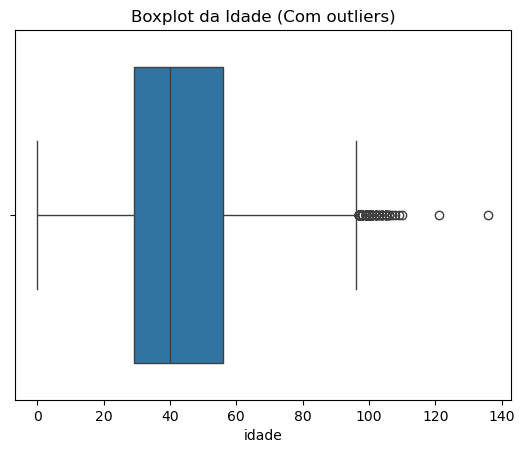

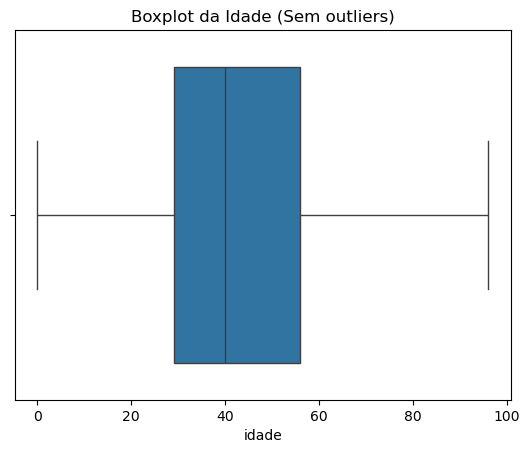

In [6]:
# remoção de outliers
q1 = df_cvd1_pos["idade"].quantile(0.25)
q3 = df_cvd1_pos["idade"].quantile(0.75)
iqr = q3 - q1

lim_sup = q3 + iqr * 1.5
lim_inf = q1 - iqr * 1.5

print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")
print(f"Limite inferior: {lim_inf}, Limite superior: {lim_sup}")

df_cvd1_pos_iqr = df_cvd1_pos[(df_cvd1_pos["idade"] >= lim_inf) & (df_cvd1_pos["idade"] < lim_sup)]

# boxplot
sns.boxplot(data=df_cvd1_pos, x='idade')
plt.title('Boxplot da Idade (Com outliers)')
plt.show()

sns.boxplot(data=df_cvd1_pos_iqr, x='idade')
plt.title('Boxplot da Idade (Sem outliers)')
plt.show()

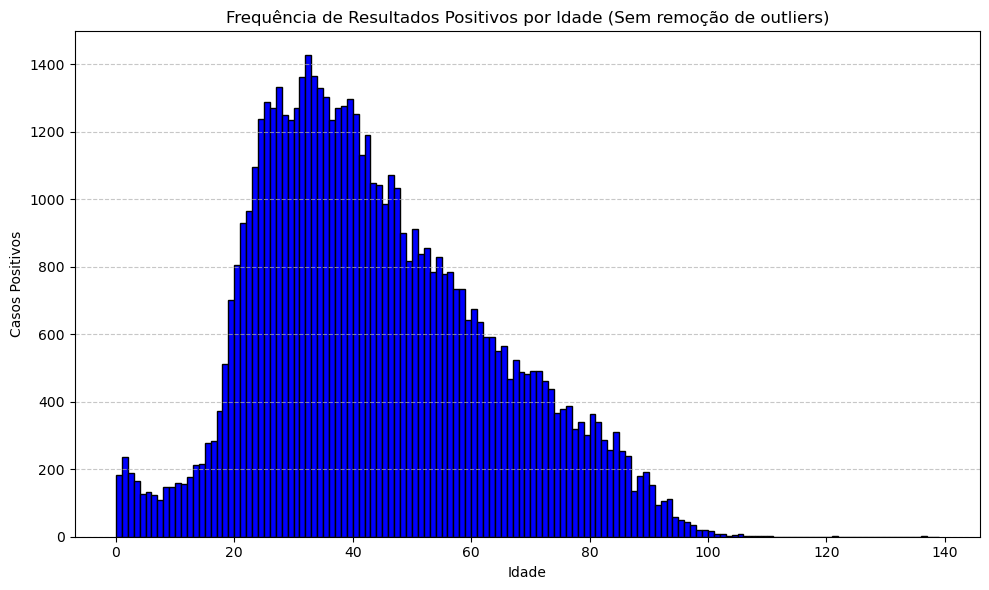

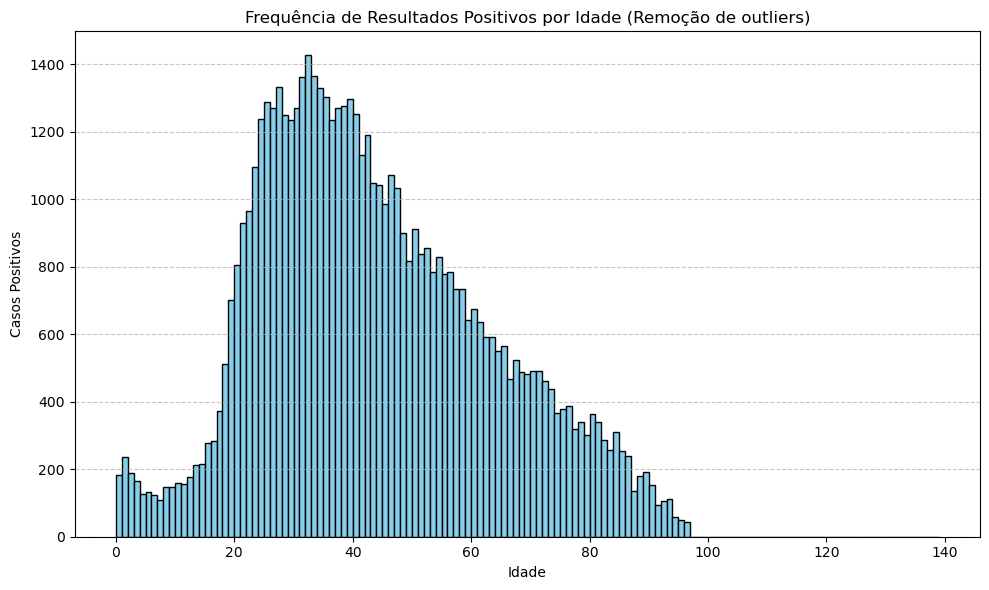

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df_cvd1_pos['idade'], bins=range(0, 140, 1), color='blue', edgecolor='black')
plt.title('Frequência de Resultados Positivos por Idade (Sem remoção de outliers)')
plt.xlabel('Idade')
plt.ylabel('Casos Positivos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_cvd1_pos_iqr['idade'], bins=range(0, 140, 1), color='skyblue', edgecolor='black')
plt.title('Frequência de Resultados Positivos por Idade (Remoção de outliers)')
plt.xlabel('Idade')
plt.ylabel('Casos Positivos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Questão 2

In [16]:
df_cvd2 = duckdb.read_csv("Covid2.csv", delimiter=";", sample_size=-1).df()
df_cvd2.tail()

,identificadorCaso,idRedcap,idEsus,idSivep,classificacaoEstadoRedcap,classificacaoEstadoEsus,classificacaoFinalEsus,evolucaoCasoEsus,cboEsus,profissionalSaudeEsus,...,tipoObitoMaterno,classificacaoFinalCasoSivep,gestante,tipoTesteEsus,obitoConfirmado,dataObito,classificacaoObito,localObito,tipoLocalObito,PACIENTEPOSITIVONOBITO
855798,75d8e014975a66b0769b234658edb67a,None,2.320092e+11,NaN,None,Negativo,Descartado,Cura,None,False,...,None,None,<NA>,TESTE RÁPIDO - ANTÍGENO,0,NaT,None,None,None,0
855799,5ee9c90b62033a4bec7bc985ea2b325d,None,2.320016e+11,NaN,None,Negativo,Descartado,Cura,None,False,...,None,None,<NA>,TESTE RÁPIDO - ANTICORPO,0,NaT,None,None,None,0
855800,27910d40cd4ae78ed0004b753b2834a4,None,2.320034e+11,NaN,None,Negativo,Descartado,Cura,None,False,...,None,None,<NA>,TESTE RÁPIDO - ANTICORPO,0,NaT,None,None,None,0
855801,204dd67198c894f07feb0d1108a5aa68,None,2.320013e+11,NaN,None,Negativo,Descartado,Cura,None,False,...,None,None,<NA>,TESTE RÁPIDO - ANTICORPO,0,NaT,None,None,None,0
855802,2c80ca5c904a993f9b9b265915fa4a2b,None,NaN,NaN,None,None,None,None,None,<NA>,...,None,None,<NA>,None,0,NaT,None,None,None,0


In [17]:
df_cvd2_pos = df_cvd2[(df_cvd2["resultadoFinalExame"] == "Positivo") &
                       (df_cvd2["idadeCaso"].notnull()) &
                        (df_cvd2["dataSolicitacaoExame"].notnull())].copy()

In [18]:
df_cvd2_pos["anoNascimento"] = df_cvd2["dataSolicitacaoExame"].dt.year - df_cvd2["idadeCaso"]

In [19]:
df_cvd2_pos.describe()

,idEsus,idSivep,codigoMunicipioCaso,idadeCaso,dataNotificacao,dataSolicitacaoExame,dataColetaExame,dataResultadoExame,dataInternacaoSivep,dataSaidaUTISivep,dataEvolucaoCasoSivep,requisicaoGal,dataNotificacaoObito,obitoConfirmado,dataObito,PACIENTEPOSITIVONOBITO,anoNascimento
count,1.518800e+04,2.319000e+03,60379.000000,60379.000000,10065,60379,60359,60379,1885,213,1846,6.013000e+04,1538,60379.000000,1538,60379.000000,60379.000000
mean,2.361910e+11,3.159583e+11,230578.333957,42.993541,2020-11-23 00:59:56.780924,2020-09-22 07:00:00.655857,2020-09-22 11:54:35.422058,2020-09-29 01:12:41.985342,2020-07-18 19:12:00,2020-08-05 05:44:47.323943,2020-07-16 01:26:35.232936,2.024207e+11,2020-07-19 10:31:11.080889,0.025472,2020-07-05 12:48:41.196359,0.974528,1977.147435
min,2.020130e+08,3.158462e+11,230010.000000,0.000000,2020-01-07 00:00:00,2020-02-03 00:00:00,2020-01-01 00:00:00,2020-03-10 10:10:54,2020-03-12 00:00:00,2020-03-31 00:00:00,2020-03-27 00:00:00,2.018000e+03,2020-05-13 14:55:51.960000,0.000000,2020-03-27 00:00:00,0.000000,1886.000000
25%,2.320246e+11,3.158948e+11,230428.000000,28.000000,2020-11-30 00:00:00,2020-07-07 00:00:00,2020-07-07 15:00:00,2020-07-09 21:16:29,2020-05-10 00:00:00,2020-05-28 00:00:00,2020-05-14 00:00:00,2.001640e+11,2020-05-20 17:37:00.499000,0.000000,2020-05-11 00:00:00,1.000000,1964.000000
50%,2.320471e+11,3.159293e+11,230440.000000,40.000000,2020-12-22 00:00:00,2020-10-16 00:00:00,2020-10-17 00:00:00,2020-10-20 22:29:37,2020-06-12 00:00:00,2020-07-16 00:00:00,2020-06-09 00:00:00,2.011030e+11,2020-06-12 15:37:34.083500,0.000000,2020-06-01 00:00:00,1.000000,1980.000000
75%,2.321552e+11,3.160225e+11,230750.000000,56.000000,2021-01-12 00:00:00,2020-12-09 00:00:00,2020-12-09 00:00:00,2020-12-14 21:39:06,2020-09-24 00:00:00,2020-10-04 00:00:00,2020-09-11 00:00:00,2.020060e+11,2020-08-19 16:18:49.645750,0.000000,2020-08-11 00:00:00,1.000000,1992.000000
max,4.120058e+12,3.161133e+11,231410.000000,135.000000,2021-01-24 00:00:00,2021-01-23 00:00:00,2021-01-23 00:00:00,2021-01-25 02:37:04,2021-01-21 00:00:00,2021-01-19 00:00:00,2021-01-22 00:00:00,2.017020e+12,2021-01-22 14:14:05.170000,1.000000,2021-01-20 00:00:00,1.000000,2021.000000
std,1.307876e+11,7.402979e+07,300.655522,19.651641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.715018e+10,NaN,0.157556,NaN,0.157556,19.685584


Remoção de outliers coluna 'anoNascimento'
Q1: 1964.0, Q3: 1992.0, IQR: 28.0
Limite inferior: 1922.0, Limite superior: 2034.0


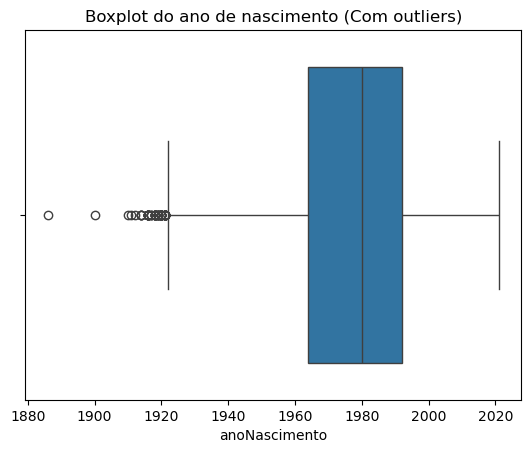

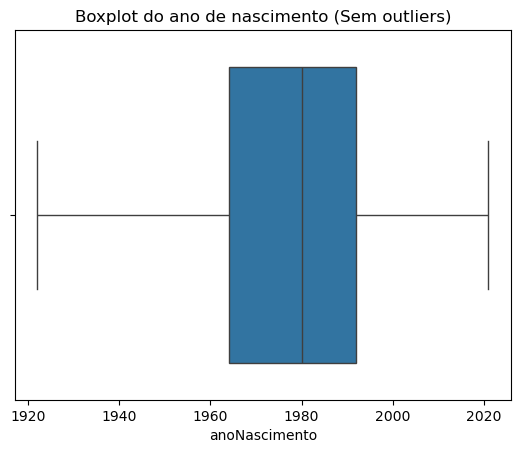

In [32]:
q1 = df_cvd2_pos["anoNascimento"].quantile(0.25)
q3 = df_cvd2_pos["anoNascimento"].quantile(0.75)
iqr = q3 - q1

lim_sup = q3 + iqr * 1.5
lim_inf = q1 - iqr * 1.5

print(f"Remoção de outliers coluna 'anoNascimento'")
print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")
print(f"Limite inferior: {lim_inf}, Limite superior: {lim_sup}")

df_cvd2_pos_iqr = df_cvd2_pos[(df_cvd2_pos["anoNascimento"] >= lim_inf) & (df_cvd2_pos["anoNascimento"] < lim_sup)]

sns.boxplot(data=df_cvd2_pos, x='anoNascimento')
plt.title('Boxplot do ano de nascimento (Com outliers)')
plt.show()

sns.boxplot(data=df_cvd2_pos_iqr, x='anoNascimento')
plt.title('Boxplot do ano de nascimento (Sem outliers)')
plt.show()

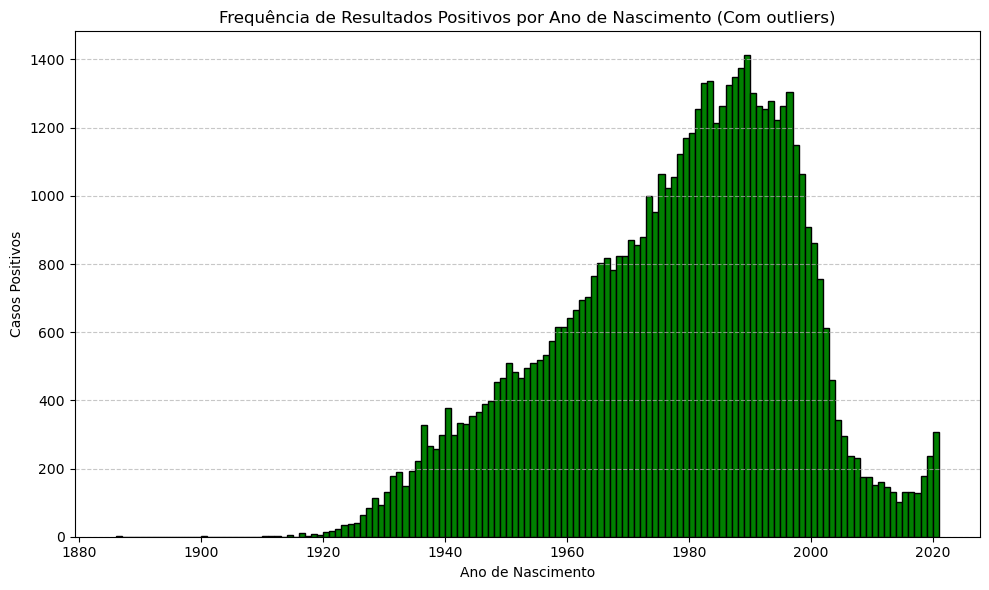

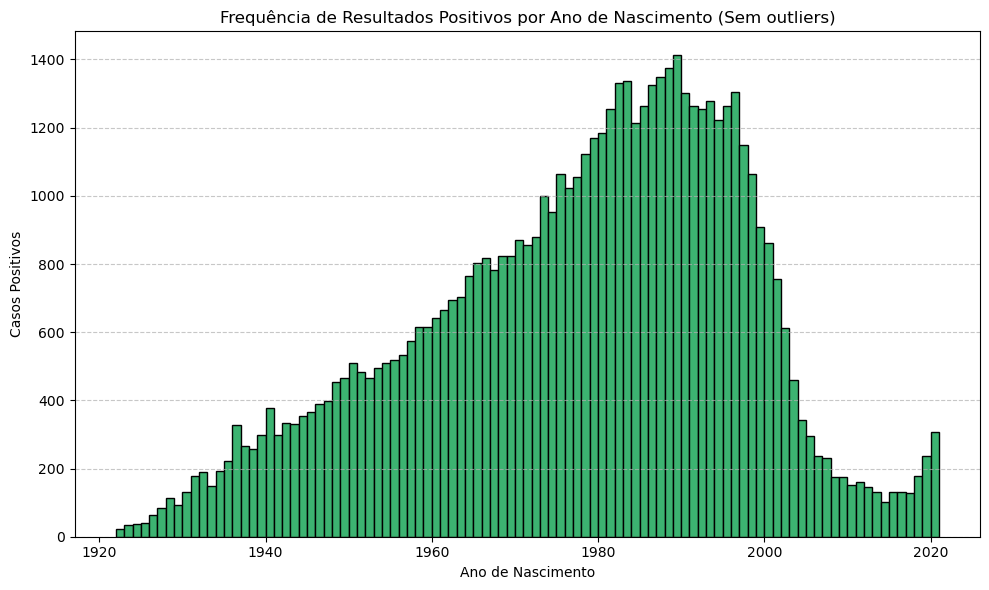

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(df_cvd2_pos["anoNascimento"], bins=range(int(df_cvd2_pos["anoNascimento"].min()), int(df_cvd2_pos["anoNascimento"].max()) + 1),
         color='green', edgecolor='black')
plt.title('Frequência de Resultados Positivos por Ano de Nascimento (Com outliers)')
plt.xlabel('Ano de Nascimento')
plt.ylabel('Casos Positivos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_cvd2_pos_iqr["anoNascimento"], bins=range(int(df_cvd2_pos_iqr["anoNascimento"].min()), int(df_cvd2_pos_iqr["anoNascimento"].max()) + 1),
         color='mediumseagreen', edgecolor='black')
plt.title('Frequência de Resultados Positivos por Ano de Nascimento (Sem outliers)')
plt.xlabel('Ano de Nascimento')
plt.ylabel('Casos Positivos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Questão 3

In [23]:
df_pos_q3 = df_cvd2[(df_cvd2["resultadoFinalExame"] == "Positivo") &
                    (df_cvd2["faixaEtaria"].notnull())].copy()

In [24]:
freq = df_pos_q3["faixaEtaria"].value_counts().sort_index()

In [25]:
print(freq)

faixaEtaria
00 a 04 anos     5736
05 a 09 anos     4927
10 a 14 anos     6301
15 a 19 anos    11154
20 a 24 anos    21653
25 a 29 anos    24886
30 a 34 anos    26492
35 a 39 anos    26174
40 a 44 anos    23640
45 a 49 anos    19773
50 a 54 anos    17409
55 a 59 anos    15126
60 a 64 anos    11610
65 a 69 anos     9297
70 a 74 anos     7906
75 a 79 anos     5788
80 ou mais       9418
Name: count, dtype: int64


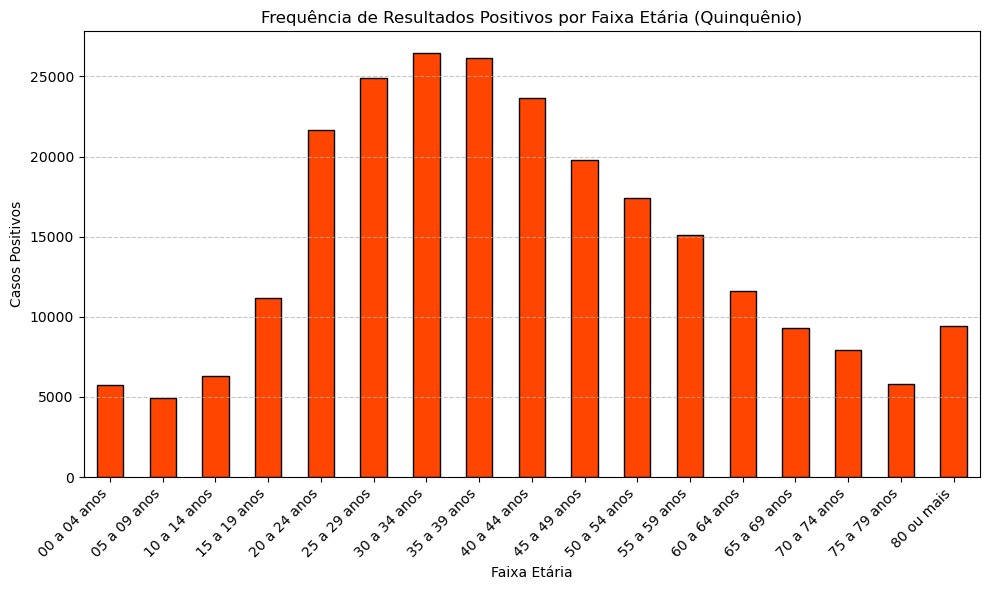

In [27]:
plt.figure(figsize=(10, 6))
freq.plot(kind="bar", color="orangered", edgecolor="black")
plt.title('Frequência de Resultados Positivos por Faixa Etária (Quinquênio)')
plt.xlabel('Faixa Etária')
plt.ylabel('Casos Positivos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()